In [35]:
%matplotlib inline

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Importing API key
from api_keys import weather_api_key

# Incorporating citipy to determine city based on latitude and longitude
from citipy import citipy

# Defining output File (CSV)
output_data_file = "../output_data/cities_HW.csv"

# Range of latitudes and longitudes across Earth
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Creating a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identifing nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Adding unique cities to the cities list
    if city not in cities:
        cities.append(city)

# Printing the city count to confirm sufficient count
len(cities)

618

In [3]:
#Creating a dataframe for storing cities data
cities_data = pd.DataFrame(cities)
cities_data.head()

,0
0,ushuaia
1,pemberton
2,bredasdorp
3,berezovyy
4,hobart


In [4]:
#Running a test (city - London) for checking weather data and formatting a correct request
url = "http://api.openweathermap.org/data/2.5/weather?"
city_check = "London"
query_url_check = url + "appid=" + weather_api_key + "&q=" + city_check + "&units=imperial" #using imperial units
#(Fahrenheit for temperature and miles per hour for wind speed)
weather_response = requests.get(query_url_check)
weather_json = weather_response.json()
print(weather_json)

{'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 44.82, 'feels_like': 38.21, 'temp_min': 43, 'temp_max': 46.4, 'pressure': 1018, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 230}, 'clouds': {'all': 40}, 'dt': 1604369110, 'sys': {'type': 1, 'id': 1414, 'country': 'GB', 'sunrise': 1604386687, 'sunset': 1604420998}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


In [5]:
#Running a test for correct requests in future
print(weather_json["coord"]["lat"])
print(weather_json["coord"]["lon"])
print(weather_json["sys"]["country"])
print(weather_json["main"]["temp_max"])
print(weather_json["main"]["humidity"])
print(weather_json["clouds"]["all"])
print(weather_json["wind"]["speed"])
print(weather_json["dt"])

51.51
-0.13
GB
46.4
75
40
6.93
1604369110


In [6]:
#Updating the cities dataframe with new columns for storing information
cities_data.rename(columns={list(cities_data)[0]: "City"}, inplace=True)
cities_data["Lat"] = ""
cities_data["Lng"] = ""
cities_data["Country"] = ""
cities_data["Temperature_max(F)"] = ""
cities_data["Humidity(%)"] = ""
cities_data["Cloudness(%)"] = ""
cities_data["Wind speed(m/h)"] = ""
cities_data["Date"] = ""
cities_data.head()

,City,Lat,Lng,Country,Temperature_max(F),Humidity(%),Cloudness(%),Wind speed(m/h),Date
0,ushuaia,,,,,,,,
1,pemberton,,,,,,,,
2,bredasdorp,,,,,,,,
3,berezovyy,,,,,,,,
4,hobart,,,,,,,,


In [7]:
# Looping through the dataframe and running information search for each city in the dataframe
for index, row in cities_data.iterrows():

    city = row["City"]
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
#Variable for storing the responce
    fill_city = requests.get(query_url)
    result = fill_city.json()
#Using "try" loop for eliminating cities with missed information 
    try:
        cities_data.loc[index, "Lat"] = result["coord"]["lat"]
        cities_data.loc[index, "Lng"] = result["coord"]["lon"]
        cities_data.loc[index, "Country"] = result["sys"]["country"]
        cities_data.loc[index, "Temperature_max(F)"] = result["main"]["temp_max"]
        cities_data.loc[index, "Humidity(%)"] = result["main"]["humidity"]
        cities_data.loc[index, "Cloudness(%)"] = result["clouds"]["all"]
        cities_data.loc[index, "Wind speed(m/h)"] = result["wind"]["speed"]
        cities_data.loc[index, "Date"] = result["dt"]
    except (KeyError, IndexError):
        print(f"For city {city} field/result are missing ... skipping.")
#Dropping rows with cities information on which is missing
        cities_data.drop(index=index, axis=0, inplace=True)
        
        
# Visualizing updated dataframe
cities_data.head()

        
    

For city taolanaro field/result are missing ... skipping.
For city umzimvubu field/result are missing ... skipping.
For city sentyabrskiy field/result are missing ... skipping.
For city illoqqortoormiut field/result are missing ... skipping.
For city krasnoyarsk-66 field/result are missing ... skipping.
For city attawapiskat field/result are missing ... skipping.
For city belushya guba field/result are missing ... skipping.
For city nizhneyansk field/result are missing ... skipping.
For city uzumlu field/result are missing ... skipping.
For city loutra ipatis field/result are missing ... skipping.
For city yanan field/result are missing ... skipping.
For city saleaula field/result are missing ... skipping.
For city mys shmidta field/result are missing ... skipping.
For city palabuhanratu field/result are missing ... skipping.
For city amderma field/result are missing ... skipping.
For city mrirt field/result are missing ... skipping.
For city samalaeulu field/result are missing ... ski

,City,Lat,Lng,Country,Temperature_max(F),Humidity(%),Cloudness(%),Wind speed(m/h),Date
0,ushuaia,-54.8,-68.3,AR,48.2,87,0,9.17,1604369236
1,pemberton,50.32,-122.8,CA,46.4,93,29,4.9,1604369253
2,bredasdorp,-34.53,20.04,ZA,64.4,88,98,11.41,1604369253
3,berezovyy,51.67,135.7,RU,31.89,91,100,2.35,1604369254
4,hobart,-42.88,147.33,AU,82.99,36,0,10.29,1604369152


In [8]:
#Reseting the index in the dataframe
cities_data = cities_data.reset_index(drop=True)
cities_data

,City,Lat,Lng,Country,Temperature_max(F),Humidity(%),Cloudness(%),Wind speed(m/h),Date
0,ushuaia,-54.8,-68.3,AR,48.2,87,0,9.17,1604369236
1,pemberton,50.32,-122.8,CA,46.4,93,29,4.9,1604369253
2,bredasdorp,-34.53,20.04,ZA,64.4,88,98,11.41,1604369253
3,berezovyy,51.67,135.7,RU,31.89,91,100,2.35,1604369254
4,hobart,-42.88,147.33,AU,82.99,36,0,10.29,1604369152
...,...,...,...,...,...,...,...,...,...
557,hamadan,34.8,48.51,IR,45.86,46,58,1.99,1604369357
558,alice springs,-23.7,133.88,AU,95,9,0,6.93,1604369250
559,sambava,-14.27,50.17,MG,69.46,80,95,6.71,1604369357
560,nanding,36.75,118.06,CN,49.95,40,0,3.42,1604369357


In [9]:
#Checking data types in the dataframe
cities_data.dtypes

City                  object
Lat                   object
Lng                   object
Country               object
Temperature_max(F)    object
Humidity(%)           object
Cloudness(%)          object
Wind speed(m/h)       object
Date                  object
dtype: object

In [10]:
#Changing data types in the dataframe (for future scatter plots and other purposes)
cities_data["Lat"] = cities_data["Lat"].astype(float)
cities_data["Lng"] = cities_data["Lng"].astype(float)
cities_data["Temperature_max(F)"] = cities_data["Temperature_max(F)"].astype(float)
cities_data["Humidity(%)"] = cities_data["Humidity(%)"].astype(float)
cities_data["Cloudness(%)"] = cities_data["Cloudness(%)"].astype(float)
cities_data["Wind speed(m/h)"] = cities_data["Wind speed(m/h)"].astype(float)
cities_data["Date"] = pd.to_datetime(cities_data["Date"], unit = "s")
cities_data


,City,Lat,Lng,Country,Temperature_max(F),Humidity(%),Cloudness(%),Wind speed(m/h),Date
0,ushuaia,-54.80,-68.30,AR,48.20,87.0,0.0,9.17,2020-11-03 02:07:16
1,pemberton,50.32,-122.80,CA,46.40,93.0,29.0,4.90,2020-11-03 02:07:33
2,bredasdorp,-34.53,20.04,ZA,64.40,88.0,98.0,11.41,2020-11-03 02:07:33
3,berezovyy,51.67,135.70,RU,31.89,91.0,100.0,2.35,2020-11-03 02:07:34
4,hobart,-42.88,147.33,AU,82.99,36.0,0.0,10.29,2020-11-03 02:05:52
...,...,...,...,...,...,...,...,...,...
557,hamadan,34.80,48.51,IR,45.86,46.0,58.0,1.99,2020-11-03 02:09:17
558,alice springs,-23.70,133.88,AU,95.00,9.0,0.0,6.93,2020-11-03 02:07:30
559,sambava,-14.27,50.17,MG,69.46,80.0,95.0,6.71,2020-11-03 02:09:17
560,nanding,36.75,118.06,CN,49.95,40.0,0.0,3.42,2020-11-03 02:09:17


In [11]:
#Checking data types in the dataframe
cities_data.dtypes

City                          object
Lat                          float64
Lng                          float64
Country                       object
Temperature_max(F)           float64
Humidity(%)                  float64
Cloudness(%)                 float64
Wind speed(m/h)              float64
Date                  datetime64[ns]
dtype: object

In [12]:
#Checking the highest humidity according to the task
cities_data["Humidity(%)"].max()


100.0

In [13]:
# Saving the dataframe as a csv file
cities_data.to_csv(output_data_file, encoding="utf-8", index=False)

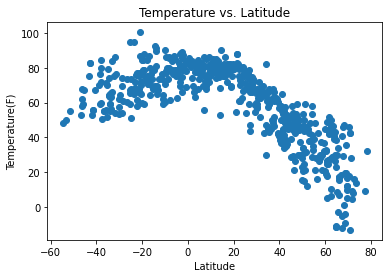

In [14]:
#Creating a scatter plot to showcase relationship
#between temperature vs. latitude across the dataframe
temperature = cities_data["Temperature_max(F)"]
latitude = cities_data["Lat"]
plt.scatter(latitude, temperature)
plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.savefig("../output_data/temp_vs_lat_all.png")
#The plot shows that there is a stong dependency between temperature and latitude, with higher temperatures 
#closer to the 0 latitude (equator)

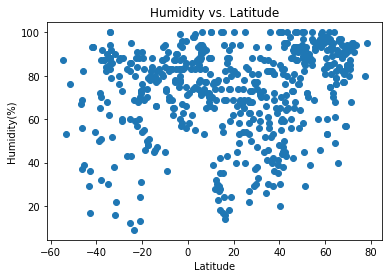

In [15]:
#Creating a scatter plot to showcase relationship
#between humidity vs. latitude across the dataframe
humidity = cities_data["Humidity(%)"]
#latitude is alredy defined
plt.scatter(latitude, humidity)
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("../output_data/humidity_vs_lat_all.png")
#As the data spread across the scatter plot it will be safe to say that there is
#no dependency between humidity and latitude in our data. But there are high levels
#of humidity in cities located near 0 latitude (equator)

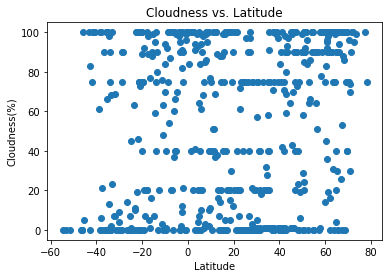

In [16]:
#Creating a scatter plot to showcase relationship
#between cloudness vs. latitude
cloudness = cities_data["Cloudness(%)"]
plt.scatter(latitude, cloudness)
plt.title("Cloudness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudness(%)")
plt.savefig("../output_data/clouds_vs_lat_all.png")
#As the data spread across the scatter plot it will be safe to say that there is
#no dependency between cloudness and latitude in our data. 

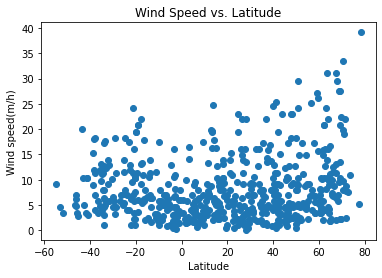

In [17]:
#Creating a scatter plot to showcase relationship
#between wind speed vs. latitude
wind_speed = cities_data["Wind speed(m/h)"]
plt.scatter(latitude, wind_speed)
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed(m/h)")
plt.savefig("../output_data/wind_vs_lat_all.png")
#As the data spread across the "x" axis of the scatter plot it will be safe to say that there is
#no dependency between wind speed and latitude in our data. There are some outliers (with wind speeds
#more then 40 m/h)

In [18]:
#Exstracting data on Northern Hemisphere from the initial dataframe
northern_hemisphere = cities_data.loc[cities_data["Lat"] >= 0,:]
northern_hemisphere.head()

,City,Lat,Lng,Country,Temperature_max(F),Humidity(%),Cloudness(%),Wind speed(m/h),Date
1,pemberton,50.32,-122.80,CA,46.40,93.0,29.0,4.90,2020-11-03 02:07:33
3,berezovyy,51.67,135.70,RU,31.89,91.0,100.0,2.35,2020-11-03 02:07:34
5,upernavik,72.79,-56.15,GL,16.38,91.0,95.0,7.49,2020-11-03 02:07:34
6,jieshi,22.81,115.83,CN,73.00,68.0,61.0,3.00,2020-11-03 02:07:34
7,hilo,19.73,-155.09,US,82.40,69.0,90.0,6.93,2020-11-03 02:02:42


In [19]:
#Reseting the index
northern_hemisphere = northern_hemisphere.reset_index(drop=True)
northern_hemisphere

,City,Lat,Lng,Country,Temperature_max(F),Humidity(%),Cloudness(%),Wind speed(m/h),Date
0,pemberton,50.32,-122.80,CA,46.40,93.0,29.0,4.90,2020-11-03 02:07:33
1,berezovyy,51.67,135.70,RU,31.89,91.0,100.0,2.35,2020-11-03 02:07:34
2,upernavik,72.79,-56.15,GL,16.38,91.0,95.0,7.49,2020-11-03 02:07:34
3,jieshi,22.81,115.83,CN,73.00,68.0,61.0,3.00,2020-11-03 02:07:34
4,hilo,19.73,-155.09,US,82.40,69.0,90.0,6.93,2020-11-03 02:02:42
...,...,...,...,...,...,...,...,...,...
382,bijie,27.31,105.29,CN,46.87,73.0,100.0,2.98,2020-11-03 02:09:16
383,goderich,43.75,-81.72,CA,44.60,65.0,97.0,23.04,2020-11-03 02:09:16
384,wajir,1.75,40.06,KE,74.30,86.0,100.0,10.02,2020-11-03 02:09:16
385,hamadan,34.80,48.51,IR,45.86,46.0,58.0,1.99,2020-11-03 02:09:17


In [20]:
#Exstracting data on Southern Hemisphere from the initial dataframe
southern_hemisphere = cities_data.loc[cities_data["Lat"] < 0,:]
southern_hemisphere.head()

,City,Lat,Lng,Country,Temperature_max(F),Humidity(%),Cloudness(%),Wind speed(m/h),Date
0,ushuaia,-54.80,-68.30,AR,48.20,87.0,0.0,9.17,2020-11-03 02:07:16
2,bredasdorp,-34.53,20.04,ZA,64.40,88.0,98.0,11.41,2020-11-03 02:07:33
4,hobart,-42.88,147.33,AU,82.99,36.0,0.0,10.29,2020-11-03 02:05:52
8,puerto ayora,-0.74,-90.35,EC,69.01,96.0,96.0,5.99,2020-11-03 02:07:35
9,saint-philippe,-21.36,55.77,RE,68.00,60.0,75.0,6.93,2020-11-03 02:07:35


In [21]:
#Reseting the index
southern_hemisphere = southern_hemisphere.reset_index(drop=True)
southern_hemisphere

,City,Lat,Lng,Country,Temperature_max(F),Humidity(%),Cloudness(%),Wind speed(m/h),Date
0,ushuaia,-54.80,-68.30,AR,48.20,87.0,0.0,9.17,2020-11-03 02:07:16
1,bredasdorp,-34.53,20.04,ZA,64.40,88.0,98.0,11.41,2020-11-03 02:07:33
2,hobart,-42.88,147.33,AU,82.99,36.0,0.0,10.29,2020-11-03 02:05:52
3,puerto ayora,-0.74,-90.35,EC,69.01,96.0,96.0,5.99,2020-11-03 02:07:35
4,saint-philippe,-21.36,55.77,RE,68.00,60.0,75.0,6.93,2020-11-03 02:07:35
...,...,...,...,...,...,...,...,...,...
170,talara,-4.58,-81.27,PE,62.80,90.0,70.0,12.84,2020-11-03 02:09:15
171,labuhan,-6.88,112.21,ID,84.16,69.0,100.0,5.44,2020-11-03 02:09:15
172,alice springs,-23.70,133.88,AU,95.00,9.0,0.0,6.93,2020-11-03 02:07:30
173,sambava,-14.27,50.17,MG,69.46,80.0,95.0,6.71,2020-11-03 02:09:17


In [22]:
#Defining a variable for latitude in Northern Hemisphere dataframe
#for comparing other parameters against it
latitude_n = northern_hemisphere["Lat"]

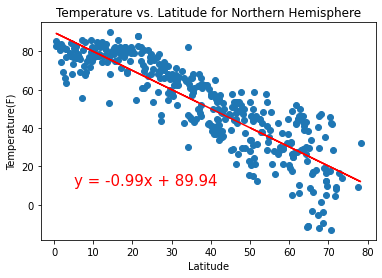

In [38]:
#Creating a scatterscatter plots to showcase relationship
#between temperature vs. latitude in Northern Hemisphere
temperature_n = northern_hemisphere["Temperature_max(F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_n, temperature_n)
regress_values = latitude_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_n, temperature_n)
plt.plot(latitude_n,regress_values,"r-")
plt.annotate(line_eq, (5,10), fontsize=15, color="red")
plt.title("Temperature vs. Latitude for Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.savefig("../output_data/temp_vs_lat_north.png")
plt.show()


In [39]:
#Defining a variable for latitude in Southern Hemisphere dataframe
#for comparing other parameters against it
latitude_s = southern_hemisphere["Lat"]

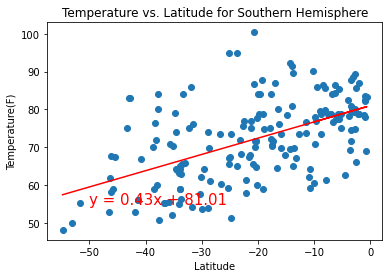

In [41]:
#Creating a scatterscatter plots to showcase relationship
#between temperature vs. latitude in Southern Hemisphere
temperature_s = southern_hemisphere["Temperature_max(F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_s, temperature_s)
regress_values = latitude_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_s, temperature_s)
plt.plot(latitude_s,regress_values,"r-")
plt.annotate(line_eq, (-50,55), fontsize=15, color="red")
plt.title("Temperature vs. Latitude for Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.savefig("../output_data/temp_vs_lat_south.png")
plt.show()

In [ ]:
#Conclusions on Temperature vs. Latitude 
#for Northern Hemisphere and Southern Hemisphere:
#There is stronger dependency between latitude and temperature
#in Northern Hemisphere than in Southern Hemisphere. Though we see
#dependency in both plots and liner regression equations Southern
#Hemisphere`s scatter plot shows more spreaded data.

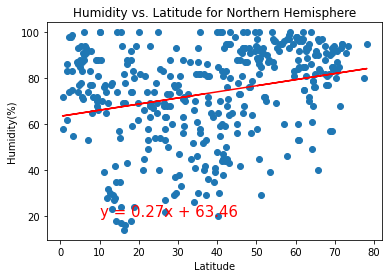

In [42]:
#Creating a scatter plots to showcase relationship
#between humidity vs. latitude in Northern Hemisphere
humidity_n = northern_hemisphere["Humidity(%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_n, humidity_n)
regress_values = latitude_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_n, humidity_n)
plt.plot(latitude_n, regress_values,"r-")
plt.annotate(line_eq, (10,20), fontsize=15, color="red")
plt.title("Humidity vs. Latitude for Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("../output_data/humidity_vs_lat_north.png")
plt.show()


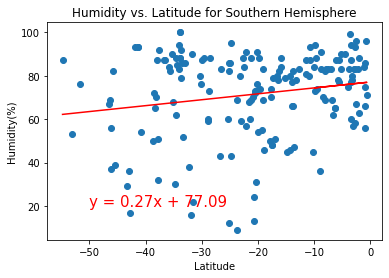

In [43]:
#Creating a scatter plots to showcase relationship
#between humidity vs. latitude in Southern Hemisphere
humidity_s = southern_hemisphere["Humidity(%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_s, humidity_s)
regress_values = latitude_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_s, humidity_s)
plt.plot(latitude_s,regress_values,"r-")
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")
plt.title("Humidity vs. Latitude for Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("../output_data/humidity_vs_lat_south.png")
plt.show()


In [ ]:
#Conclusions on Humidity vs. Latitude 
#for Northern Hemisphere and Southern Hemisphere:
#There is no dependency or there is very weak dependency between latitude and Humidity
#in Northern Hemisphere  and in Southern Hemisphere. Data on both scatter plots is
#spreaded across.

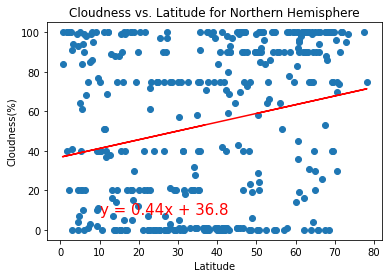

In [44]:
#Creating a scatter plot to showcase relationship
#between cloudness vs. latitude in Northern Hemisphere
cloudness_n = northern_hemisphere["Cloudness(%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_n, cloudness_n)
regress_values = latitude_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_n, cloudness_n)
plt.plot(latitude_n,regress_values,"r-")
plt.annotate(line_eq, (10,8), fontsize=15, color="red")
plt.title("Cloudness vs. Latitude for Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudness(%)")
plt.savefig("../output_data/clouds_vs_lat_north.png")
plt.show()


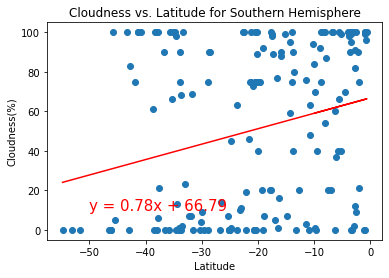

In [45]:
#Creating a scatter plots to showcase relationship
#between cloudness vs. latitude in Southern Hemisphere
cloudness_s = southern_hemisphere["Cloudness(%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_s, cloudness_s)
regress_values = latitude_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_s, cloudness_s)
plt.plot(latitude_s,regress_values,"r-")
plt.annotate(line_eq, (-50,10), fontsize=15, color="red")
plt.title("Cloudness vs. Latitude for Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudness(%)")
plt.savefig("../output_data/clouds_vs_lat_south.png")
plt.show()


In [ ]:
#Conclusions on Cloudness vs. Latitude 
#for Northern Hemisphere and Southern Hemisphere:
#There is no dependency between latitude and Cloudness
#in Northern Hemisphere  and in Southern Hemisphere. Data on both scatter plots is
#spreaded across.

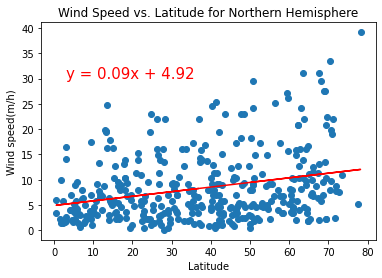

In [46]:
#Creating a scatter plots to showcase relationship
#between wind speed vs. latitude in Northern Hemisphere
wind_speed_n = northern_hemisphere["Wind speed(m/h)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_n, wind_speed_n)
regress_values = latitude_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_n, wind_speed_n)
plt.plot(latitude_n,regress_values,"r-")
plt.annotate(line_eq, (3,30), fontsize=15, color="red")
plt.title("Wind Speed vs. Latitude for Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind speed(m/h)")
plt.savefig("../output_data/wind_vs_lat_north.png")
plt.show()


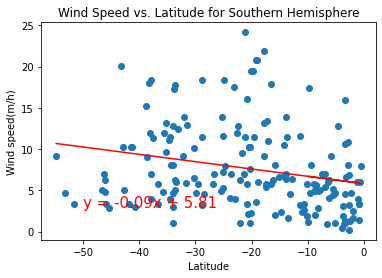

In [47]:
#Creating a scatter plots to showcase relationship
#between wind speed vs. latitude in Southern Hemisphere
wind_speed_s = southern_hemisphere["Wind speed(m/h)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_s, wind_speed_s)
regress_values = latitude_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude_s, wind_speed_s)
plt.plot(latitude_s,regress_values,"r-")
plt.annotate(line_eq, (-50,3), fontsize=15, color="red")
plt.title("Wind Speed vs. Latitude for Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind speed(m/h)")
plt.savefig("../output_data/wind_vs_lat_south.png")
plt.show()


In [ ]:
#Conclusions on Wind Speed vs. Latitude 
#for Northern Hemisphere and Southern Hemisphere:
#There is no dependency between latitude and Wind Speed
#in Northern Hemisphere  and in Southern Hemisphere. Though, we can
#definetely see that data on Northern Hemisphere includes some outliers
#(wind speed above 25 m/h). In the same time data on Southern Hemiphere
#is more grouped and the maximum wind speed on the scatter plot doesn`t exceed 
#25 miles per hour. But this maybe result of smaller dataset of cities in Southern Hemispere


In [ ]:
#FINAL OBSERVATIONS
#1). Number of cities in Northern Hemisphere is greater than in Southern Hemisphere
#2). This analysis didn`t find a certain dependency between latitude and Humidity, Cloudness or
#Wind Speed. Though, there is a strong correlation between latitude and Temperature with 
#greater values of temperature near the equator with descending toward the poles.
#3). There is overall greater temperatures values in Southern Hemisphere for now,
#which is the result of different seasons in both Hemispheres(spring in South and autumn in North). 